# Tutorial 2
Question proposed by teacher and answers done by Chensheng LUO of CentraleSupélec

We first load the data needed.

In [1]:
import numpy as np
array1 = np.loadtxt('Projectdata.txt')
print(array1)
array2 = [31.7, 39.2, 57.5, 65.8, 70.0, 101.7, 109.2, 130.0]
array3 = [6.21, 5.12, 2.99, 2.00, 9.79, 5.78, 5.54, 6.44, 8.92, 6.19]

[ 98474.4  12373.4 107318.4   9739.7  13000.1  12207.7  63589.4  31893.8
   5784.9   9662.7  61731.1  15269.2   4730.   11269.2  26947.1  27838.1
  90682.5   8086.6   7905.6  48162.7]


## Exercise 1

We study the failure dates of pressure transmitters (PT) recorded in the file Projectdata.txt.
1. Demonstrate that it is reasonable to assume an exponential probability density function for the lifetime of the PT.
2. Estimate the parameter of the pdf with two methods.
3. Propose a test to accept or reject the assumption that the exponential pdf obtained with the estimated failure rate is the good one.

**Answer**
1. We calculate the mean and the standard deviation, then we calculate the sample coefficient of variation CV, which is close to 1 and proves that it is reasonable to assume an exponential probability density function for the lifetime of the PT.

In [2]:
import statistics
m=statistics.mean(array1)
s=statistics.stdev(array1)
print(m/s)

1.0000005152914064


2. We first do with the **MLE**. With the calculation, we have $\lambda_{\text{MLE}}=\frac{1}{E(x)}$

In [3]:
lambda_MLE = 1/m
print('The estimation of lambda by MLE method is', lambda_MLE)

The estimation of lambda by MLE method is 3.0000003000000297e-05


We can then use the **method of moment**: we have that the theorical expectation is $E[X]=\frac{1}{\lambda}$ so $\lambda_{MM}=\frac{1}{E[x]}$

In [4]:
lambda_MM = 1/m
print('The estimation of lambda by MM is', lambda_MM)

The estimation of lambda by MM is 3.0000003000000297e-05


We can then verify the quality of estimation:

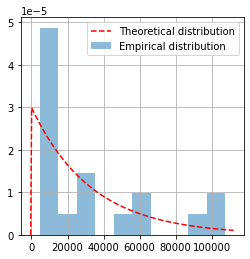

In [5]:
import matplotlib.pyplot as plt
from scipy.stats import expon

fig, ax = plt.subplots(1, 1, figsize=(4, 4))

## Statistic-Empirical
ax.hist(array1,density=True, alpha=0.5, label='Empirical distribution')

## Theoretical distribution
xlim = ax.get_xlim()
vx = np.arange(xlim[0], xlim[1],500)
vy = expon.pdf(vx, scale=1/lambda_MLE)
ax.plot(vx, vy, 'r--', label='Theoretical distribution')

ax.grid(True)
ax.legend(loc='upper right')

3. We do the Kolmogorov-Smirnov test:

In [6]:
from scipy import stats
scipy.stats.kstest(array1, expon.cdf(array1, scale=1/lambda_MLE))

NameError: name 'scipy' is not defined

## Exercise 2
We study the failure dates of pressure transmitters (PT) recorded in the file Projectdata.txt.
1. Determine the empirical cumulative distribution corresponding to this data set and plot it.
2. Compare with the cumulative distribution found in Exercise 1.
3. Comment and explain how you could improve your results.

**Answer**

1. By the following code:

In [ ]:
import matplotlib.pyplot as plt
from scipy.stats import expon

fig, ax = plt.subplots(1, 1, figsize=(4, 4))

## Statistic-Empirical
ax.hist(array1,density=True,cumulative=True,alpha=0.5, label='Empirical cumulative distribution')

## Theoretical distribution
xlim = ax.get_xlim()
vx = np.arange(xlim[0], xlim[1],500)
vy = expon.cdf(vx, scale=1/lambda_MLE)
ax.plot(vx, vy, 'r--', label='Theoretical distribution')

ax.grid(True)
ax.legend(loc='upper right')

2. Let's plot the Q-Q plot:

In [ ]:
# We can use probplot function
from scipy.stats import probplot
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
probplot(array1, dist=expon, sparams=(1/lambda_MLE), plot=ax)
ax.grid(True)

In [ ]:
# We can also try to write by ourselves

## First we sort the array
array1 = np.sort(array1)

## Find the corresponding theorical point: emperical cumulative pdf
theorical=[]
for i in range(len(array1)):
    theorical.append(expon.ppf((i+1)/len(array1), scale=1/lambda_MLE))

## Plot it!
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
ax.scatter(array1, theorical)
xlim = ax.get_xlim()
ylim = ax.get_ylim()
lim = [np.min([xlim[0], ylim[0]]), np.max([xlim[1], ylim[1]])]
ax.plot(lim, lim, 'r')
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.grid(True)

## Exercise3 

We consider a complete sample of lifetimes that are independent and identical to Weibull distribution.
1. Propose a method to estimate the parameters of the distribution
2. Apply it to the follow data set: (31.7, 39.2, 57.5, 65.8, 70.0, 101.7, 109.2, 130.0)

**Answer**
We use the methode of **maximisation of likelihood function**, here we use ```optimize``` package:


In [ ]:
import scipy

def weib(x,n,a):
    return (a / n) * (x / n)**(a - 1) * np.exp(-(x / n)**a)

def likelihood(x): 
    likelihood=1
    for i in array2:
        likelihood *= weib(i,x[0],x[1])
    return likelihood
max_x = scipy.optimize.fmin(lambda x: 1/likelihood(x), [120,1])
print(max_x)

## Exercise4

We consider the following sample: (6.21, 5.12, 2.99, 2.00, 9.79, 5.78, 5.54, 6.44, 8.92, 6.19)  
Propose a method to accept or reject the assumption that the data are from the Normal distribution $N(5, 2^{2})$. We want a probability of error equals to 0.243 (i.e. the probability to decide that the data are not from the Normal distribution $N(5, 2^{2})$ whereas they are).

**Answer** Let's do Kolmogorov-Smirnov test.


In [ ]:
from scipy import stats
new=[]
for i in array3:
    new.append(i-5)
scipy.stats.kstest(new, stats.norm.cdf(array1, scale=2))


In [ ]:
## First we sort the array
new = np.sort(new)

## Find the corresponding theorical point: emperical cumulative pdf
difference=[]
for i in range(len(new)):
    difference.append(abs(stats.norm.cdf(new[i], scale=2)-(i+1)/len(new)))
    difference.append(abs(stats.norm.cdf(new[i], scale=2)-i/len(new)))
print('Maximum of difference is', max(difference))

## Threshold
import math
alpha = 0.243
threshold = 1/ math.sqrt(len(array3)) *  stats.kstwobign.ppf(1-alpha)
print('threshold is ',threshold)

## Answer
print('The answer of the test is:',max(difference)<threshold,'.')